# Random Forest Algorithm example

Phase 1: Importing the libraries

In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


Phase 2: Importing the csv file

In [92]:
df = pd.read_csv("kc_house_data.csv")

Phase 3: Adapting the CSV to our needs

In [93]:
df.drop(columns=["id", "date", "sqft_living15", "sqft_lot15"], inplace=True)

df["house_age"] = 2015 - df["yr_built"]
df["is_renovated"] = (df["yr_renovated"] > 0).astype(int)

df.drop(columns=["yr_built", "yr_renovated"], inplace=True)

df.dropna(inplace=True)


Phase 4: Working with the features/independent variables and target/dependent variable

In [94]:
features = [
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
    "waterfront", "view", "condition", "grade", "sqft_basement",
    "zipcode", "lat", "long", "house_age", "is_renovated"
]

target = "price"

X = df[features]
y = df[target]

Phase 5: The split of train-test 

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Phase 6: Training the regressor 

In [96]:
model_rf = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
model_rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Phase 7: Making predictions and evaluating

In [97]:
y_pred =  model_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [98]:
r2

0.8563949033445949

In [99]:
float(np.round(rmse, 2))

147342.28

Graphic: Showing feature importance

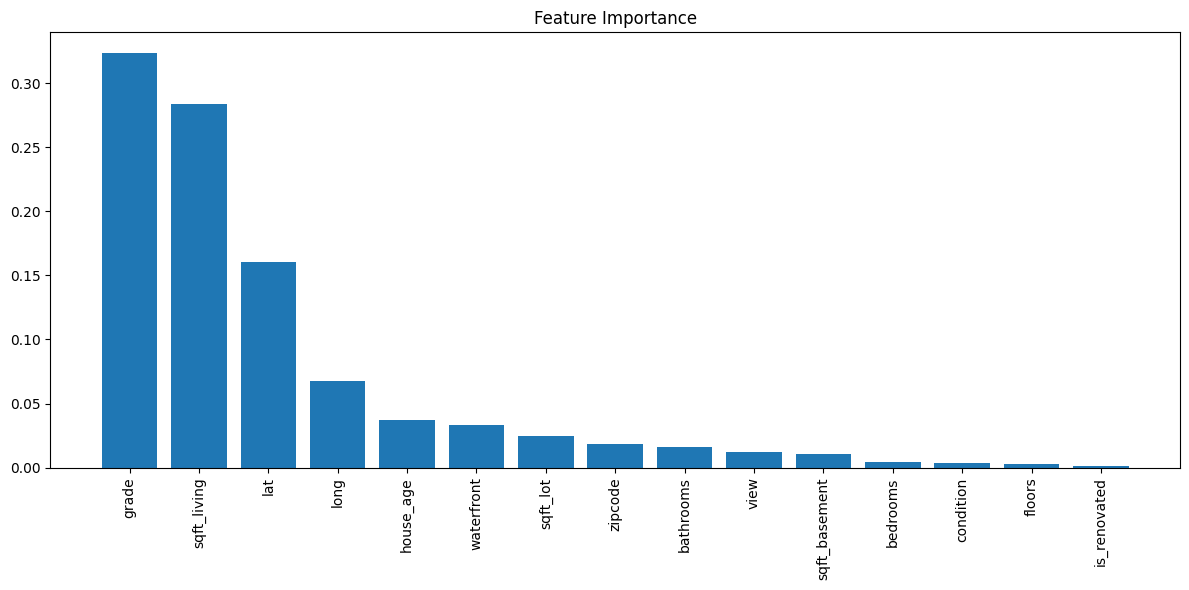

In [100]:

importances = model_rf.feature_importances_
features = X.columns


sorted_idx = importances.argsort()[::-1]
plt.figure(figsize=(12, 6))
plt.bar(range(len(importances)), importances[sorted_idx], align='center')
plt.xticks(range(len(importances)), features[sorted_idx], rotation=90)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()
